# IPO project - EDA

The dataset consists of 20,452 rows, each representing an IPO. \
Each row is comprised of 22 columns providing various information about the company, including country, deal value of the IPO, financial and economic details before the IPO, sector of the company, stock price after IPO, stock price after one week, and stock price after one month.

(For more info on dataset, check https://github.com/EdoPedrocchi/RicercaMente/blob/main/Projects/IPO/indexIPO.md)

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import category_encoders as ce
import numpy as np

In [18]:
df = pd.read_excel("../IPOdataset.xlsx")

In [19]:
df.head(10)

,Target country code,Deal value\nth USD,Target business description(s),Completed date,Deal equity value\nth USD,Pre-deal target operating revenue/turnover\nth USD Last avail. yr,Pre-deal target EBITDA\nth USD Last avail. yr,Pre-deal target EBIT\nth USD Last avail. yr,Pre-deal target profit before tax\nth USD Last avail. yr,Pre-deal target profit after tax\nth USD Last avail. yr,...,Pre-deal target net assets\nth USD Last avail. yr,Pre-deal target current liabilities\nth USD Last avail. yr,Pre-deal target shareholders funds\nth USD Last avail. yr,Pre-deal target market capitalisation (Last available year)\nth USD,Pre-deal target number of months\nLast avail. yr,Target stock price 1 month after completion\nUSD,Target major sector,Target stock price after completion\nUSD,Target stock price after completion\nUSD.1,Target stock price 1 week after completion\nUSD
0,US,113000000,Cigarette manufacturer,2008-03-28,n.a.,22810000,9850000,8894000,8884000,6314000,...,15595000,8091000,15595000,n.a.,12,52.02,"Food, beverages, tobacco",52.02,52.02,52.02
1,US,47000000,Online payment processing services holding com...,2015-07-17,47000000,8025000,1784000,1268000,1261000,419000,...,8248000,13283000,8248000,n.a.,12,38.73,Other services,40.470001,40.470001,37
2,IE,22000000,"Automotive dashboard displays manufacturer, Au...",2016-10-31,22000000,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,n.a.,n.a.,n.a.,53.560001,"Machinery, equipment, furniture, recycling",45.299999,45.299999,44.599998
3,US,17640000,"Crude oil pipeline operator, Natural gas distr...",2006-12-14,n.a.,9454000,2589000,1853000,2335000,1409000,...,12253000,7314000,11504000,n.a.,12,25.85,"Gas, Water, Electricity",28.620001,28.620001,28.620001
4,IT,16446774.375436,"Electricity distribution services, Electricity...",1999-11-02,16446774.375436,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,n.a.,n.a.,n.a.,5.233764,"Gas, Water, Electricity",5.233764,5.233764,5.233764
5,US,13000000,Print and Internet yellow pages directories pu...,2006-11-20,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,n.a.,n.a.,n.a.,100,NaN,100,100,100
6,FR,12471846.893149,"Investment services, Telecommunications services",1997-10-21,12471846.893149,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,n.a.,n.a.,n.a.,34.754611,Post and telecommunications,34.754611,34.754611,34.754611
7,BE,11089670.828604,"Residential property management services, Resi...",2006-10-23,11089670.828604,4202.295371,1509.648127,1334.342288,-204.31328,-279.984866,...,71882.961281,4372.556438,71880.438895,n.a.,7,57.050868,Other services,57.631681,57.631681,57.631681
8,GB,10499455.139847,"Media services, Motion picture production serv...",2004-02-02,10499455.139847,3183799.491464,477660.733745,319651.289502,54486.015256,-12713.40356,...,3007628.042136,937159.462405,3005811.841627,6133727.172356,n.a.,2.543876,Other services,2.678734,2.678734,2.562684
9,BM,9290000,"Broadband internet services provider, Telecomm...",2017-12-29,9290000,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,n.a.,n.a.,n.a.,23.48,Post and telecommunications,21.58,21.58,21.09


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20452 entries, 0 to 20451
Data columns (total 22 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Target country code                                                 20452 non-null  object        
 1   Deal value
th USD                                                   20448 non-null  object        
 2   Target business description(s)                                      20439 non-null  object        
 3   Completed date                                                      20448 non-null  datetime64[ns]
 4   Deal equity value
th USD                                            20448 non-null  object        
 5   Pre-deal target operating revenue/turnover
th USD Last avail. yr    20452 non-null  object        
 6   Pre-deal target EBITDA
th USD Last avail. yr          

We've observed both null values and "n.a." values in the dataset, which are inappropriate. 
Let's start by counting the total number of non-valid values in the dataset.


In [21]:
print(df.isnull().sum())

Target country code                                                       0
Deal value\nth USD                                                        4
Target business description(s)                                           13
Completed date                                                            4
Deal equity value\nth USD                                                 4
Pre-deal target operating revenue/turnover\nth USD Last avail. yr         0
Pre-deal target EBITDA\nth USD Last avail. yr                             0
Pre-deal target EBIT\nth USD Last avail. yr                               0
Pre-deal target profit before tax\nth USD Last avail. yr                  0
Pre-deal target profit after tax\nth USD Last avail. yr                   0
Pre-deal target net profit\nth USD Last avail. yr                         0
Pre-deal target total assets\nth USD Last avail. yr                       0
Pre-deal target net assets\nth USD Last avail. yr                         0
Pre-deal tar

In [22]:
(df == 'n.a.').sum()

Target country code                                                        0
Deal value\nth USD                                                      5057
Target business description(s)                                             0
Completed date                                                             0
Deal equity value\nth USD                                               5706
Pre-deal target operating revenue/turnover\nth USD Last avail. yr      12326
Pre-deal target EBITDA\nth USD Last avail. yr                          13538
Pre-deal target EBIT\nth USD Last avail. yr                            11866
Pre-deal target profit before tax\nth USD Last avail. yr               11694
Pre-deal target profit after tax\nth USD Last avail. yr                11963
Pre-deal target net profit\nth USD Last avail. yr                      14974
Pre-deal target total assets\nth USD Last avail. yr                    11451
Pre-deal target net assets\nth USD Last avail. yr                      15005

In [23]:
(df["Deal value\nth USD"] == df["Deal equity value\nth USD"]).sum()

19742

In [24]:
(df["Target stock price after completion\nUSD"] == df["Target stock price after completion\nUSD.1"]).sum()

20452

Some more information that we find:

- Columns containing "Pre-deal" information are populated with "n.a." values instead of integer type values, making them unsuitable for analysis. They will be excluded from our analysis.
- The column "Pre-deal target market capitalization" contains approximately 19,500 null values. We can remove this column.
- Information regarding target stock prices (after completion, 1 week, and 1 month) are essential for our analysis, so rows with null values in these columns will be removed.
- The column "Deal equity value" duplicates the information in the "Deal value" column and can be dropped.
- The column "Target stock price after completion\nUSD.1" is a duplicate and will be dropped as well.

To handle invalid values, one approach is to remove all rows with these types of values (NaN or "n.a."). \
Following this approach, the final dataset will contain approximately 4,000 rows. 

Another approach could involve replacing null values with the mean value for each column. However, for now, we will investigate the first approach.

In [25]:
## Remove columns -> "Pre-deal market capitalisation",
##                   "Deal equity value","Target businees description","Target stock price after completion\nUSD.1"

df = df.drop(columns=["Pre-deal target market capitalisation (Last available year)\nth USD", \
                      "Deal equity value\nth USD", "Target business description(s)", \
                      "Target stock price after completion\nUSD.1"])
df.head()

,Target country code,Deal value\nth USD,Completed date,Pre-deal target operating revenue/turnover\nth USD Last avail. yr,Pre-deal target EBITDA\nth USD Last avail. yr,Pre-deal target EBIT\nth USD Last avail. yr,Pre-deal target profit before tax\nth USD Last avail. yr,Pre-deal target profit after tax\nth USD Last avail. yr,Pre-deal target net profit\nth USD Last avail. yr,Pre-deal target total assets\nth USD Last avail. yr,Pre-deal target net assets\nth USD Last avail. yr,Pre-deal target current liabilities\nth USD Last avail. yr,Pre-deal target shareholders funds\nth USD Last avail. yr,Pre-deal target number of months\nLast avail. yr,Target stock price 1 month after completion\nUSD,Target major sector,Target stock price after completion\nUSD,Target stock price 1 week after completion\nUSD
0,US,113000000,2008-03-28,22810000,9850000,8894000,8884000,6314000,6038000,31777000,15595000,8091000,15595000,12,52.02,"Food, beverages, tobacco",52.02,52.02
1,US,47000000,2015-07-17,8025000,1784000,1268000,1261000,419000,419000,21917000,8248000,13283000,8248000,12,38.73,Other services,40.470001,37
2,IE,22000000,2016-10-31,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,53.560001,"Machinery, equipment, furniture, recycling",45.299999,44.599998
3,US,17640000,2006-12-14,9454000,2589000,1853000,2335000,1409000,674000,35056000,12253000,7314000,11504000,12,25.85,"Gas, Water, Electricity",28.620001,28.620001
4,IT,16446774.375436,1999-11-02,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,5.233764,"Gas, Water, Electricity",5.233764,5.233764


We replace the "n.a." values with null values and then drop all the rows containing these null values.

In [26]:
df_withoutNull = df.replace("n.a.",np.nan,inplace=False)

In [27]:
print(df_withoutNull.isnull().sum())

Target country code                                                      0
Deal value\nth USD                                                    5061
Completed date                                                           4
Pre-deal target operating revenue/turnover\nth USD Last avail. yr    12326
Pre-deal target EBITDA\nth USD Last avail. yr                        13538
Pre-deal target EBIT\nth USD Last avail. yr                          11866
Pre-deal target profit before tax\nth USD Last avail. yr             11694
Pre-deal target profit after tax\nth USD Last avail. yr              11963
Pre-deal target net profit\nth USD Last avail. yr                    14974
Pre-deal target total assets\nth USD Last avail. yr                  11451
Pre-deal target net assets\nth USD Last avail. yr                    15005
Pre-deal target current liabilities\nth USD Last avail. yr           11590
Pre-deal target shareholders funds\nth USD Last avail. yr            11443
Pre-deal target number of

In [28]:
df_withoutNull.dropna(inplace=True)
df_withoutNull.isnull().sum()

Target country code                                                  0
Deal value\nth USD                                                   0
Completed date                                                       0
Pre-deal target operating revenue/turnover\nth USD Last avail. yr    0
Pre-deal target EBITDA\nth USD Last avail. yr                        0
Pre-deal target EBIT\nth USD Last avail. yr                          0
Pre-deal target profit before tax\nth USD Last avail. yr             0
Pre-deal target profit after tax\nth USD Last avail. yr              0
Pre-deal target net profit\nth USD Last avail. yr                    0
Pre-deal target total assets\nth USD Last avail. yr                  0
Pre-deal target net assets\nth USD Last avail. yr                    0
Pre-deal target current liabilities\nth USD Last avail. yr           0
Pre-deal target shareholders funds\nth USD Last avail. yr            0
Pre-deal target number of months\nLast avail. yr                     0
Target

In [29]:
df_withoutNull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3565 entries, 0 to 15385
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype         
---  ------                                                            --------------  -----         
 0   Target country code                                               3565 non-null   object        
 1   Deal value
th USD                                                 3565 non-null   float64       
 2   Completed date                                                    3565 non-null   datetime64[ns]
 3   Pre-deal target operating revenue/turnover
th USD Last avail. yr  3565 non-null   float64       
 4   Pre-deal target EBITDA
th USD Last avail. yr                      3565 non-null   float64       
 5   Pre-deal target EBIT
th USD Last avail. yr                        3565 non-null   float64       
 6   Pre-deal target profit before tax
th USD Last avail. yr           3565 non-n

After removing the rows with null values, the dimensions of our dataset have decreased, and now we have around 3.5k rows.

#### Add Column "Success"

Now we add the column "Success" (used as target label) based on the prices of the stocks on the IPO completion, after 1 week and after 1 month.

- y = 1 if "Target stock price after completion USD" < "Target stock price 1 week after completion USD" < "Target stock price 1 month after completion USD" , The IPO is a "succes"
- y = 0 if "Target stock price after completion USD" = "Target stock price 1 week after completion USD" = "Target stock price 1 month after completion USD" , The IPO is "constant"
- y = -1 if "Target stock price after completion USD" > "Target stock price 1 week after completion USD" > "Target stock price 1 month after completion USD" , The IPO is a "failure"

In [30]:
def IPOsuccess(row):
    
    if int(row["Target stock price after completion\nUSD"]) < int(row["Target stock price 1 week after completion\nUSD"]) and \
       int(row["Target stock price 1 week after completion\nUSD"]) < int(row["Target stock price 1 month after completion\nUSD"]):
        
        return 1
    
    elif int(row["Target stock price after completion\nUSD"]) > int(row["Target stock price 1 week after completion\nUSD"]) and \
       int(row["Target stock price 1 week after completion\nUSD"]) > int(row["Target stock price 1 month after completion\nUSD"]):
        return -1
    
    return 0

df_withoutNull["Y"] = df_withoutNull.apply(IPOsuccess,axis=1)

In [33]:
df_withoutNull.head(10)

,Target country code,Deal value\nth USD,Completed date,Pre-deal target operating revenue/turnover\nth USD Last avail. yr,Pre-deal target EBITDA\nth USD Last avail. yr,Pre-deal target EBIT\nth USD Last avail. yr,Pre-deal target profit before tax\nth USD Last avail. yr,Pre-deal target profit after tax\nth USD Last avail. yr,Pre-deal target net profit\nth USD Last avail. yr,Pre-deal target total assets\nth USD Last avail. yr,Pre-deal target net assets\nth USD Last avail. yr,Pre-deal target current liabilities\nth USD Last avail. yr,Pre-deal target shareholders funds\nth USD Last avail. yr,Pre-deal target number of months\nLast avail. yr,Target stock price 1 month after completion\nUSD,Target major sector,Target stock price after completion\nUSD,Target stock price 1 week after completion\nUSD,Y
0,US,1.130000e+08,2008-03-28,2.281000e+07,9.850000e+06,8.894000e+06,8.884000e+06,6.314000e+06,6.038000e+06,3.177700e+07,1.559500e+07,8.091000e+06,1.559500e+07,12.0,52.020000,"Food, beverages, tobacco",52.020000,52.020000,0
1,US,4.700000e+07,2015-07-17,8.025000e+06,1.784000e+06,1.268000e+06,1.261000e+06,4.190000e+05,4.190000e+05,2.191700e+07,8.248000e+06,1.328300e+07,8.248000e+06,12.0,38.730000,Other services,40.470001,37.000000,0
3,US,1.764000e+07,2006-12-14,9.454000e+06,2.589000e+06,1.853000e+06,2.335000e+06,1.409000e+06,6.740000e+05,3.505600e+07,1.225300e+07,7.314000e+06,1.150400e+07,12.0,25.850000,"Gas, Water, Electricity",28.620001,28.620001,0
7,BE,1.108967e+07,2006-10-23,4.202295e+03,1.509648e+03,1.334342e+03,-2.043133e+02,-2.799849e+02,-2.799849e+02,1.557145e+05,7.188296e+04,4.372556e+03,7.188044e+04,7.0,57.050868,Other services,57.631681,57.631681,0
11,US,8.680000e+06,2001-06-13,2.292200e+07,4.874000e+06,3.840000e+06,3.415000e+06,2.001000e+06,2.001000e+06,5.207100e+07,1.404800e+07,7.590000e+06,1.404800e+07,12.0,35.610001,"Food, beverages, tobacco",35.610001,35.610001,0
15,US,6.354828e+06,2008-05-07,5.695000e+06,1.236000e+06,1.080000e+06,8.170000e+05,4.950000e+05,4.970000e+05,1.052800e+07,5.021000e+06,1.135000e+06,5.021000e+06,12.0,22.540001,"Food, beverages, tobacco",24.950001,24.950001,0
22,NL,4.600000e+06,2012-06-12,3.767048e+06,5.978655e+05,4.724712e+05,5.431359e+05,3.823868e+05,3.823868e+05,6.664664e+06,4.751552e+06,1.663429e+06,4.751552e+06,12.0,11.110000,"Food, beverages, tobacco",10.674000,10.674000,0
23,US,4.500000e+06,2006-09-05,4.472832e+06,5.478040e+05,4.336000e+05,4.163200e+05,3.224930e+05,3.224930e+05,4.903886e+06,3.229134e+06,1.624765e+06,3.229134e+06,12.0,5.787500,"Textiles, wearing apparel, leather",5.277500,5.482500,0
44,US,3.034222e+06,2016-10-03,9.701000e+05,3.267000e+05,2.798000e+05,2.787000e+05,2.199000e+05,2.120000e+05,1.043800e+06,-1.034000e+05,1.043000e+05,-1.373000e+05,12.0,22.620001,"Chemicals, rubber, plastics, non-metallic prod...",24.490000,23.490000,-1
45,US,3.000000e+06,2006-11-16,2.373100e+06,2.182010e+05,1.802010e+05,1.801090e+05,1.101930e+05,1.101930e+05,1.338841e+06,1.005967e+06,2.911820e+05,1.005967e+06,12.0,7.760000,Wholesale & retail trade,7.760000,7.760000,0


In [48]:
df_withoutNull["Y"].value_counts()

Y
 0    3193
-1     259
 1     113
Name: count, dtype: int64

We know that only 113 company out of 3500 have had a success IPO

Let's find some simple statistics about the distribution of the data about the IPO

#### 1. Number of IPO per states

<BarContainer object of 15 artists>

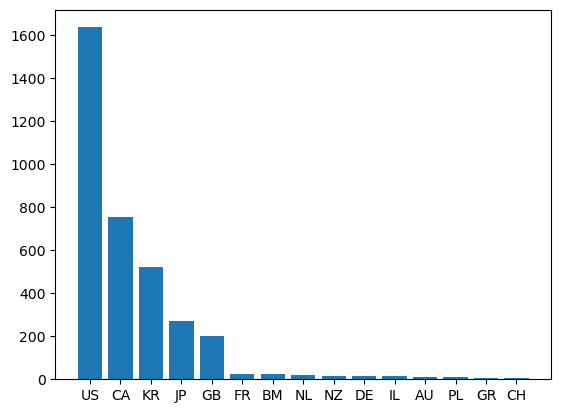

In [34]:
# number of IPO per states (without considering NaN values) -> first 15 countries
IPOperStates = df_withoutNull["Target country code"].value_counts()
plt.bar(IPOperStates.keys()[:15],IPOperStates.values[:15])


#### 2. Number of IPOs per year (from 1997 to 2023)

('1997', 6)
('1998', 6)
('1999', 13)
('2000', 135)
('2001', 41)
('2002', 53)
('2003', 73)
('2004', 177)
('2005', 187)
('2006', 263)
('2007', 326)
('2008', 159)
('2009', 104)
('2010', 179)
('2011', 230)
('2012', 226)
('2013', 191)
('2014', 183)
('2015', 123)
('2016', 73)
('2017', 107)
('2018', 109)
('2019', 105)
('2020', 144)
('2021', 232)
('2022', 95)
('2023', 25)


<BarContainer object of 27 artists>

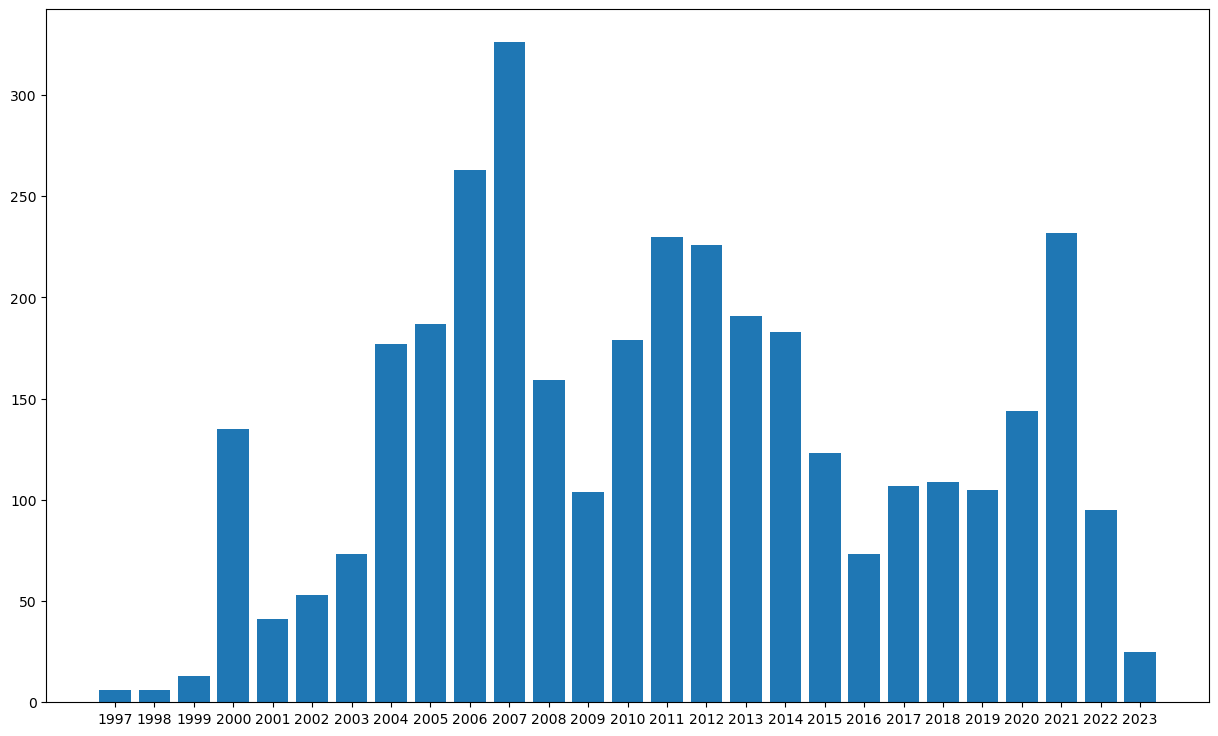

In [35]:
df_year = df_withoutNull["Completed date"].map(lambda x: str(x).split("-")[0])

df_year = df_year[df_year != "NaT"]
#sorted(dict(df_year.value_counts()).items())
## 1995, 1996 missing, we remove year 1994 (just one row)

df_year = df_year[df_year != "1994"]
IPOcountPerYear = dict(sorted(dict(df_year.value_counts()).items()))
for i in IPOcountPerYear.items():
    print(i)

plt.figure(figsize=(15,9))
plt.bar(IPOcountPerYear.keys(),IPOcountPerYear.values())

#### 3. Number of IPO for Target sector

Target major sector
Other services                                        1626
Machinery, equipment, furniture, recycling             519
Metals & metal products                                334
Chemicals, rubber, plastics, non-metallic products     217
Wholesale & retail trade                               181
Primary Sector (agriculture, mining, etc.)             172
Publishing, printing                                   139
Food, beverages, tobacco                                59
Hotels & restaurants                                    57
Construction                                            53
Transport                                               52
Education, Health                                       40
Post and telecommunications                             38
Textiles, wearing apparel, leather                      32
Gas, Water, Electricity                                 26
Insurance companies                                     10
Wood, cork, paper                   

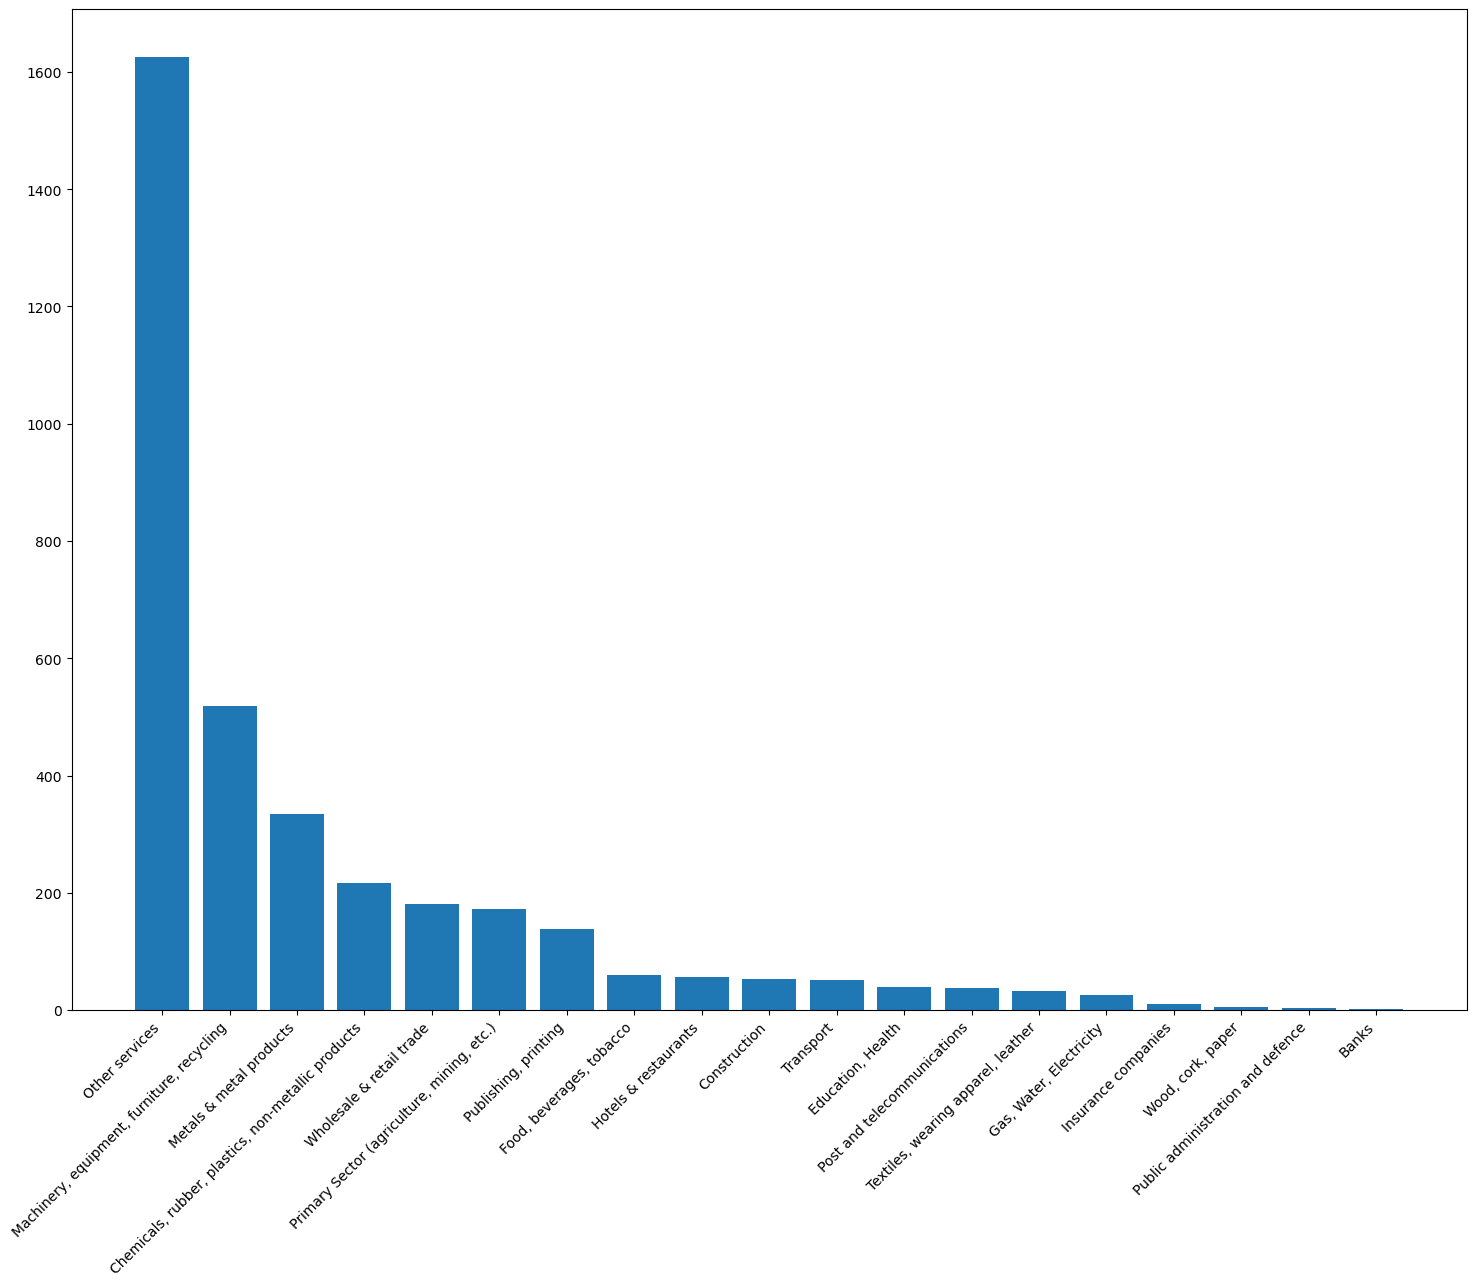

In [36]:
IPOcountPerSector = df_withoutNull["Target major sector"].value_counts()

print(IPOcountPerSector)

plt.figure(figsize=(18,13))
plt.bar(IPOcountPerSector.keys(),IPOcountPerSector.values)

plt.xticks(rotation=45,ha='right')

plt.show()

### Encode categorical variable with binary encoding

We first remove the column "Completed date".

In [39]:
df_withoutNull.drop(columns=["Completed date"],inplace=True)

Let's encode the categorical variable (Target country code, Target major sector) by using the binary encoding

In [40]:
encoder = ce.BinaryEncoder(cols=['Target country code',"Target major sector"])
df_encoded = encoder.fit_transform(df_withoutNull)

In [41]:
df_encoded.head()

,Target country code_0,Target country code_1,Target country code_2,Target country code_3,Target country code_4,Deal value\nth USD,Pre-deal target operating revenue/turnover\nth USD Last avail. yr,Pre-deal target EBITDA\nth USD Last avail. yr,Pre-deal target EBIT\nth USD Last avail. yr,Pre-deal target profit before tax\nth USD Last avail. yr,...,Pre-deal target number of months\nLast avail. yr,Target stock price 1 month after completion\nUSD,Target major sector_0,Target major sector_1,Target major sector_2,Target major sector_3,Target major sector_4,Target stock price after completion\nUSD,Target stock price 1 week after completion\nUSD,Y
0,0,0,0,0,1,1.130000e+08,2.281000e+07,9.850000e+06,8.894000e+06,8.884000e+06,...,12.0,52.020000,0,0,0,0,1,52.020000,52.020000,0
1,0,0,0,0,1,4.700000e+07,8.025000e+06,1.784000e+06,1.268000e+06,1.261000e+06,...,12.0,38.730000,0,0,0,1,0,40.470001,37.000000,0
3,0,0,0,0,1,1.764000e+07,9.454000e+06,2.589000e+06,1.853000e+06,2.335000e+06,...,12.0,25.850000,0,0,0,1,1,28.620001,28.620001,0
7,0,0,0,1,0,1.108967e+07,4.202295e+03,1.509648e+03,1.334342e+03,-2.043133e+02,...,7.0,57.050868,0,0,0,1,0,57.631681,57.631681,0
11,0,0,0,0,1,8.680000e+06,2.292200e+07,4.874000e+06,3.840000e+06,3.415000e+06,...,12.0,35.610001,0,0,0,0,1,35.610001,35.610001,0


In [43]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3565 entries, 0 to 15385
Data columns (total 26 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Target country code_0                                             3565 non-null   int64  
 1   Target country code_1                                             3565 non-null   int64  
 2   Target country code_2                                             3565 non-null   int64  
 3   Target country code_3                                             3565 non-null   int64  
 4   Target country code_4                                             3565 non-null   int64  
 5   Deal value
th USD                                                 3565 non-null   float64
 6   Pre-deal target operating revenue/turnover
th USD Last avail. yr  3565 non-null   float64
 7   Pre-deal target EBITDA
th USD Last av

To conclude , we remove the columns: "Target stock price 1 month after completion" and "Target stock price 1 week after completion".
This because these two columns have a strong correlation with the target label "Success" and so they can influence the algorithms to estimate the Success or not of the IPO.

In [44]:
df_encoded.drop(columns=["Target stock price 1 month after completion\nUSD","Target stock price 1 week after completion\nUSD"],inplace=True)

In [45]:
df_encoded.head(10)

,Target country code_0,Target country code_1,Target country code_2,Target country code_3,Target country code_4,Deal value\nth USD,Pre-deal target operating revenue/turnover\nth USD Last avail. yr,Pre-deal target EBITDA\nth USD Last avail. yr,Pre-deal target EBIT\nth USD Last avail. yr,Pre-deal target profit before tax\nth USD Last avail. yr,...,Pre-deal target current liabilities\nth USD Last avail. yr,Pre-deal target shareholders funds\nth USD Last avail. yr,Pre-deal target number of months\nLast avail. yr,Target major sector_0,Target major sector_1,Target major sector_2,Target major sector_3,Target major sector_4,Target stock price after completion\nUSD,Y
0,0,0,0,0,1,1.130000e+08,2.281000e+07,9.850000e+06,8.894000e+06,8.884000e+06,...,8.091000e+06,1.559500e+07,12.0,0,0,0,0,1,52.020000,0
1,0,0,0,0,1,4.700000e+07,8.025000e+06,1.784000e+06,1.268000e+06,1.261000e+06,...,1.328300e+07,8.248000e+06,12.0,0,0,0,1,0,40.470001,0
3,0,0,0,0,1,1.764000e+07,9.454000e+06,2.589000e+06,1.853000e+06,2.335000e+06,...,7.314000e+06,1.150400e+07,12.0,0,0,0,1,1,28.620001,0
7,0,0,0,1,0,1.108967e+07,4.202295e+03,1.509648e+03,1.334342e+03,-2.043133e+02,...,4.372556e+03,7.188044e+04,7.0,0,0,0,1,0,57.631681,0
11,0,0,0,0,1,8.680000e+06,2.292200e+07,4.874000e+06,3.840000e+06,3.415000e+06,...,7.590000e+06,1.404800e+07,12.0,0,0,0,0,1,35.610001,0
15,0,0,0,0,1,6.354828e+06,5.695000e+06,1.236000e+06,1.080000e+06,8.170000e+05,...,1.135000e+06,5.021000e+06,12.0,0,0,0,0,1,24.950001,0
22,0,0,0,1,1,4.600000e+06,3.767048e+06,5.978655e+05,4.724712e+05,5.431359e+05,...,1.663429e+06,4.751552e+06,12.0,0,0,0,0,1,10.674000,0
23,0,0,0,0,1,4.500000e+06,4.472832e+06,5.478040e+05,4.336000e+05,4.163200e+05,...,1.624765e+06,3.229134e+06,12.0,0,0,1,0,0,5.277500,0
44,0,0,0,0,1,3.034222e+06,9.701000e+05,3.267000e+05,2.798000e+05,2.787000e+05,...,1.043000e+05,-1.373000e+05,12.0,0,0,1,0,1,24.490000,-1
45,0,0,0,0,1,3.000000e+06,2.373100e+06,2.182010e+05,1.802010e+05,1.801090e+05,...,2.911820e+05,1.005967e+06,12.0,0,0,1,1,0,7.760000,0
